In [1]:
from io import open
import random, time, math, os, string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf

# **Dataset**

In [5]:
languages = []
data = []
X = []
y = []

text = open('/content/name2lang.txt', 'r').readlines()
for line in text:
  line = line.split(',')
  name = line[0].strip()
  lang = line[1].strip()
  if not lang in languages:
    languages.append(lang)
  X.append(name)
  y.append(lang)
  data.append((name,lang))

n_languages = len(languages)

In [6]:
print(languages)

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']


In [7]:
data[:5]

[('Abreu', 'Portuguese'),
 ('Albuquerque', 'Portuguese'),
 ('Almeida', 'Portuguese'),
 ('Alves', 'Portuguese'),
 ('Araujo', 'Portuguese')]

# **Train-test split**

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)

In [9]:
print(X_train)

['Abashkin', 'Gulimov', 'Tzelobenok', 'Funnell', 'Zhui', 'Jukes', 'Togunov', 'Sabbag', 'Kartomyshev', 'Makhnenko', 'Sokolsky', 'Masuno', 'Varela', 'Moffat', 'Bonner', 'Berezovsky', 'Helkvist', 'Thurston', 'Tovstuha', 'Millar', 'Tulintsev', 'Furey', 'Isaenko', 'Kalachev', 'Takecare', 'Newcombe', 'Taku', 'Artibyakin', 'Saifulov', 'Morcos', 'Jagodnikov', 'Halifman', 'Bagaryakoff', 'Pavluhin', 'Mari', 'Awramchik', 'Agaltsov', 'Fisichev', 'Shizuma', 'Yankin', 'Luts', 'Toshitala', 'Germain', 'Botros', 'Poulter', 'Lischenko', 'Porter', 'Melendez', 'Ibu', 'Carr', 'Ursler', 'Aderikhin', 'Gimondi', 'Rzhevsky', 'Slater', 'Atkin', 'Yagafarov', 'Huraskin', 'Underhill', 'Pylin', 'Yuschenko', 'Ardovini', 'Tunison', 'Dobrovolsky', 'Bezyzvestnyh', 'Roussel', 'Balakshin', 'Trumbauer', 'Vallance', 'Boerio', 'Waugh', 'Baz', 'Reading', 'Komon', 'Ireson', 'Venables', 'Tikhotsky', 'Spada', 'Winfield', 'Mikhnov', 'Lubsky', 'Antar', 'Sheehan', 'Tuma', 'Yuzefovich', 'Yamburg', 'Yukhvidov', 'Mikhail', 'Chi', 'De

In [10]:
print(len(X_train),len(X_test))

16040 4010


# **Encoding names and language**

In [11]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [12]:
def name_rep(name):
  rep = tf.zeros((len(name),1,n_letters), dtype=tf.float16)
  for index,char in enumerate(name):
    pos = all_letters.find(char)
    rep = rep.numpy()
    rep[index,0,pos] = 1
    rep = tf.convert_to_tensor(rep,dtype=tf.float16) 
  return rep

In [13]:
def lang_rep(lang):
  return tf.constant([languages.index(lang)], dtype=tf.float16)

In [14]:
name_rep('Abreu')

<tf.Tensor: shape=(5, 1, 57), dtype=float16, numpy=
array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 

In [15]:
lang_rep('Portuguese')

<tf.Tensor: shape=(1,), dtype=float16, numpy=array([0.], dtype=float16)>

# **Basic Visualizastion**

In [16]:
count = {}
for lang in languages:
  count[lang] = 0
for d in data:
  count[d[1]] += 1
print(count)

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


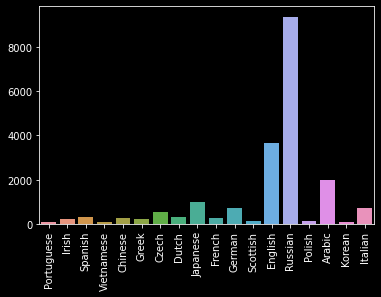

In [17]:
plt.style.use('dark_background')
plt_ = sns.barplot(x=list(count.keys()),y=list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(),rotation=90)
plt.show()

# **Basic network and testing inference**

In [30]:
class RNN_net(tf.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(RNN_net,self).__init__()
    self.i2h = tf.keras.layers.Dense(hidden_size)
    self.i2o = tf.keras.layers.Dense(output_size, activation='softmax')
    self.hidden_size = hidden_size
  
  def __call__(self,x,hidden):
    combined = tf.concat([x.numpy(), hidden.numpy()], 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    return output, hidden
  
  def init_hidden(self):
    return tf.zeros((1,self.hidden_size), dtype=tf.float16)


In [31]:
hidden_size = 128
net = RNN_net(n_letters,hidden_size,n_languages)

In [18]:
def infer(model, name):
  name_ohe = name_rep(name)
  hidden = model.init_hidden()

  for i in range(name_ohe.shape[0]):
    output, hidden = model(name_ohe[i], hidden)
  
  return output

In [22]:
output = infer(net, 'Adam')
print(output, np.argmax(output.numpy()))

tf.Tensor(
[[0.05944036 0.05421005 0.04649211 0.06070324 0.06021584 0.05232147
  0.0519196  0.05084863 0.0574945  0.05319405 0.08318504 0.0689005
  0.0483634  0.06832331 0.04387999 0.04679931 0.04208064 0.051628  ]], shape=(1, 18), dtype=float32) 10


In [23]:
net.variables

(<tf.Variable 'dense/kernel:0' shape=(185, 128) dtype=float32, numpy=
 array([[-0.02044006,  0.0265089 ,  0.1230741 , ...,  0.10386312,
         -0.03199334, -0.1325055 ],
        [ 0.12683628, -0.06485657, -0.06854267, ...,  0.01831152,
         -0.12205247,  0.0744586 ],
        [-0.10994908, -0.07041519,  0.07242018, ...,  0.07625344,
          0.02861851, -0.0602809 ],
        ...,
        [ 0.04937802,  0.03797984,  0.07778418, ...,  0.0363766 ,
          0.00711791,  0.08747706],
        [-0.01094973, -0.00283043,  0.01483957, ...,  0.09195983,
          0.07086062,  0.02973434],
        [ 0.01017836,  0.01398575,  0.11869796, ...,  0.07689767,
         -0.08981228,  0.0262586 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [24]:
net.trainable_variables

(<tf.Variable 'dense/kernel:0' shape=(185, 128) dtype=float32, numpy=
 array([[-0.02044006,  0.0265089 ,  0.1230741 , ...,  0.10386312,
         -0.03199334, -0.1325055 ],
        [ 0.12683628, -0.06485657, -0.06854267, ...,  0.01831152,
         -0.12205247,  0.0744586 ],
        [-0.10994908, -0.07041519,  0.07242018, ...,  0.07625344,
          0.02861851, -0.0602809 ],
        ...,
        [ 0.04937802,  0.03797984,  0.07778418, ...,  0.0363766 ,
          0.00711791,  0.08747706],
        [-0.01094973, -0.00283043,  0.01483957, ...,  0.09195983,
          0.07086062,  0.02973434],
        [ 0.01017836,  0.01398575,  0.11869796, ...,  0.07689767,
         -0.08981228,  0.0262586 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

# **Evaluate Model**

In [19]:
def dataloader(npoints,X,y):
  to_ret = []
  for i in range(npoints):
    index = np.random.randint(len(X))
    name, lang = X[index], y[index]
    to_ret.append((name, lang, name_rep(name), lang_rep(lang)))
  return to_ret

In [20]:
dataloader(1,X_train,y_train)

[('Roth', 'English', <tf.Tensor: shape=(4, 1, 57), dtype=float16, numpy=
  array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.]],
  
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.]],
  
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0.]],
  
         [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0.

In [21]:
def evaluate(model, n_points, X, y):
  data = dataloader(n_points, X, y)
  correct = 0

  for name, lang, name_ohe, lang_rep in data:
    output = infer(model, name)
    output = output.numpy()
    #indices = output.argsort()[-3:] + 1
    indices = np.argmax(output)
    if lang_rep.numpy() == indices:
      correct += 1

  accuracy = correct/n_points
  return accuracy

In [32]:
evaluate(net,1000,X_test,y_test)

0.037

# **Training**

In [22]:
def train(model, opt, loss_object, n_points):
  total_loss = 0
  data = dataloader(n_points,X_train,y_train)
  for name, lang, name_ohe, lang_rep in data:

    with tf.GradientTape(persistent=True) as tape:
      output = infer(model, name)
      loss = loss_object(lang_rep, output)

    total_loss += loss
    gradients = tape.gradient(loss, model.variables)
    opt.apply_gradients((grad, var) 
      for (grad, var) in zip(gradients, model.trainable_variables) 
      if grad is not None)
  
  return total_loss/n_points

In [23]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

In [38]:
%%time
train(net,optimizer,loss_object,200)

CPU times: user 2.3 s, sys: 3.66 ms, total: 2.31 s
Wall time: 2.33 s


<tf.Tensor: shape=(), dtype=float32, numpy=1.527984>

In [39]:
evaluate(net, 1000, X_test, y_test)

0.537

# **Full training setup**

In [24]:
def train_setup(model, lr=0.01, n_batches=100, batch_size=10, momentum=0.9):
  optimizer = tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.9)
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
  loss_arr = np.zeros(n_batches+1)
  for i in range(n_batches):
    loss_arr[i] = train(model,optimizer,loss_object,batch_size)
  return loss_arr

In [41]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)
train_loss = train_setup(net,0.01,100,10,0.9)

In [42]:
evaluate(net,1000,X_test,y_test)

0.59

In [ ]:
def infer(model, name):
  name_ohe = name_rep(name)
  hidden = model.init_hidden()

  for i in range(name_ohe.shape[0]):
    output, hidden = model(name_ohe[i], hidden)
  
  return output

In [47]:
output = infer(net, 'Shah')
#print(output)
[print(languages[x]) for x in output.numpy()[0].argsort()[-3:]]

English
Arabic
Russian


[None, None, None]

In [169]:
output.numpy()[0].argsort()[-3:]

array([15, 13, 12])

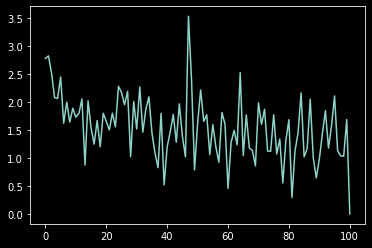

In [48]:
plt.plot(train_loss)

# **LSTM Model**

In [38]:
class LSTM_net(tf.keras.Model):
  def __init__(self, input_size, hidden_size, output_size):
    super(LSTM_net,self).__init__()
    self.i2h = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
    self.i2o = tf.keras.layers.Dense(hidden_size,activation='softmax')
    self.hidden_size = hidden_size
  
  def __call__(self, inputs, hidden):
    inputs = tf.reshape(inputs,[1,1,-1])
    combined = tf.concat([inputs.numpy(),hidden.numpy()],2)
    hidden= self.i2h(combined)
    output = self.i2o(hidden[0])
    return output, hidden
  
  def init_hidden(self):
    return tf.zeros([1,1,self.hidden_size])

In [39]:
n_hidden = 128
net = LSTM_net(n_letters, n_hidden, n_languages)

In [40]:
evaluate(net,1000,X_test,y_test)

0.011

In [41]:
train_loss = train_setup(net,0.01,100,256,0.9)

In [42]:
evaluate(net,1000,X_test,y_test)

0.683

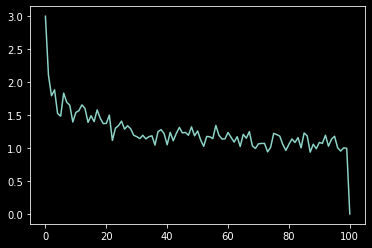

In [44]:
plt.plot(train_loss)

In [57]:
output = infer(net, "Patel")
#print(output)
[print(languages[x]) for x in output.numpy()[0].argsort()[-3:]]

Russian
English
Arabic


[None, None, None]